In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import gutenberg, stopwords

In [2]:
titles = ['1984', 'animal', 'brave', 'cats', 'do', 'gather', 'scanner', 'sh5']

In [3]:
file = open('C:\\Users\\justf\\Desktop\\txtfiles\\1984.txt')

In [4]:
def cleaner(text):
    pattern = "[\[].*?[\]]"
    text = re.sub(pattern, '', text)
    text = ' '.join(text.split())
    text = re.sub('[ï»¿]', '', text)
    text = re.sub(r'Chapter \d+', '', text)
    text = text.lower()
    return text

In [5]:
text_1984 = file.read()

In [6]:
text_1984 = cleaner(text_1984)

In [7]:
import spacy
nlp = spacy.load('en')

In [8]:
doc_1984 = nlp(text_1984)

In [9]:
sents_1984 = [[sent, "Orwell", '1984'] for sent in doc_1984.sents]

In [13]:
file_animal = open('C:\\Users\\justf\\Desktop\\txtfiles\\animalfarm.txt')

In [14]:
text_aniaml = file_animal.read()

In [15]:
text_aniaml = cleaner(text_aniaml)

In [17]:
doc_animal = nlp(text_aniaml)

In [18]:
file_brave = open('C://Users//justf//Desktop//txtfiles/bravenewworld.txt')
text_brave = file_brave.read()
text_brave = cleaner(text_brave)
doc_brave = nlp(text_brave)

In [20]:
# take each file and have it read()
# name it 'read_*filename*' 
# take each read_file and have it cleaned
# name each cleaned file "text_*filename*"
# have text_file converted to Spacy, name "doc_*filename*"

In [21]:
file_cats = open('C://Users//justf//Desktop//txtfiles/catscraddle.txt')
text_cats = file_cats.read()
text_cats = cleaner(text_cats)
doc_cats = nlp(text_cats)

In [22]:
file_do = open('C://Users//justf//Desktop//txtfiles/doandriods.txt')
text_do = file_do.read()
text_do = cleaner(text_do)
doc_do = nlp(text_do)

In [23]:
file_gather = open('C://Users//justf//Desktop//txtfiles/gatheringblue.txt')
text_gather = file_gather.read()
text_gather = cleaner(text_gather)
doc_gather = nlp(text_gather)

In [24]:
file_scanner = open('C://Users//justf//Desktop//txtfiles/scannerdarkly.txt')
text_scanner = file_scanner.read()
text_scanner = cleaner(text_scanner)
doc_scanner = nlp(text_scanner)

In [25]:
file_sh5 = open('C://Users//justf//Desktop//txtfiles/slaughterhouse5.txt')
text_sh5 = file_sh5.read()
text_sh5 = cleaner(text_sh5)
doc_sh5 = nlp(text_sh5)

In [26]:
sents_sh5 = [[sent, 'Vonnegut', "Slaughter House 5"] for sent in  doc_sh5.sents]
sents_scanner = [[sent, 'Dick', 'A Scanner Darkly'] for sent in doc_scanner.sents]
sents_gather = [[sent, 'Lowry', 'Gathering Blue'] for sent in doc_gather.sents]
sents_do = [[sent, 'Dick', 'Do Andriods'] for sent in doc_do.sents]
sents_cats = [[sent, "Vonnegut", "Cat's Craddle"] for sent in doc_cats.sents]
sents_brave = [[sent, "Huxley",  'Brave New Word'] for sent in doc_brave.sents]
sents_animal = [[sent, "Orwell", "Animal Farm"] for sent in doc_animal.sents]

In [27]:
sentences = pd.DataFrame(sents_1984[0:100] + sents_animal[0:100] + sents_brave[0:100] + sents_cats[0:100] +
                         sents_do[0:100] +sents_gather[0:100 ]+ sents_scanner[0:100] +sents_sh5[0:100])

In [28]:
sentences.columns = ['Sentence', 'Author', 'Book']

In [29]:
sentences.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 3 columns):
Sentence    800 non-null object
Author      800 non-null object
Book        800 non-null object
dtypes: object(3)
memory usage: 18.8+ KB


In [30]:
# sentences.to_csv('C:\\Users\\justf\\Desktop\\txtfiles\\test.csv')
sentences.iloc[:,0] = sentences.iloc[:,0].astype('str')

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

vectorizer = TfidfVectorizer(max_df=0.5, # drop words that occur in more than half the paragraphs
                             min_df=1, # only use words that appear at least twice
                             stop_words='english', 
                             lowercase=False, #convert everything to lower case (since Alice in Wonderland has the HABIT of CAPITALIZING WORDS for EMPHASIS)
                             use_idf=True,#we definitely want to use inverse document frequencies in our weighting
                             norm=u'l2', #Applies a correction factor so that longer paragraphs and shorter paragraphs get treated equally
                             smooth_idf=True #Adds 1 to all document frequencies, as if an extra document existed that used every word once.  Prevents divide-by-zero errors
                            )

In [32]:
sents_tfidf = vectorizer.fit_transform(sentences.iloc[:,0].values)

In [33]:
sents_tfidf.shape

(800, 2551)

In [34]:
sents_tfidf_csr = sents_tfidf.tocsr()

In [35]:
n = sents_tfidf_csr.shape[0]

In [36]:
print(n)

800


In [57]:
from sklearn.cluster import KMeans

num_clusters = 4
km = KMeans(n_clusters=num_clusters)

%time km.fit(sents_tfidf)

clusters = km.labels_.tolist()

Wall time: 462 ms


In [58]:
km.cluster_centers_

array([[0.00072563, 0.        , 0.00042393, ..., 0.00057364, 0.00035739,
        0.00070983],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00384599, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [60]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(sents_tfidf)

In [61]:
import os  # for os.path.basename
import matplotlib as mpl
from sklearn.manifold import MDS

MDS()

# convert two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]

In [62]:
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=sentences.loc[:,'Book'])) 

In [63]:
groups = df.groupby('label')

In [66]:
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a' }
#                   4:'#BDB76B', 5:'#FFD700', 6: '#00FF00', 7:'#FAA460'}

#set up cluster names using a dict
cluster_names = {0: 'One', 
                 1: 'Two', 
                 2: 'Three', 
                 3: 'Four'}
#                  4: 'Five',
#                  5: 'Six',
#                  6: 'Seven', 
#                  7: 'Eight'}

C:\Users\justf\conda\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
C:\Users\justf\conda\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
C:\Users\justf\conda\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
C:\Users\justf\conda\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passi

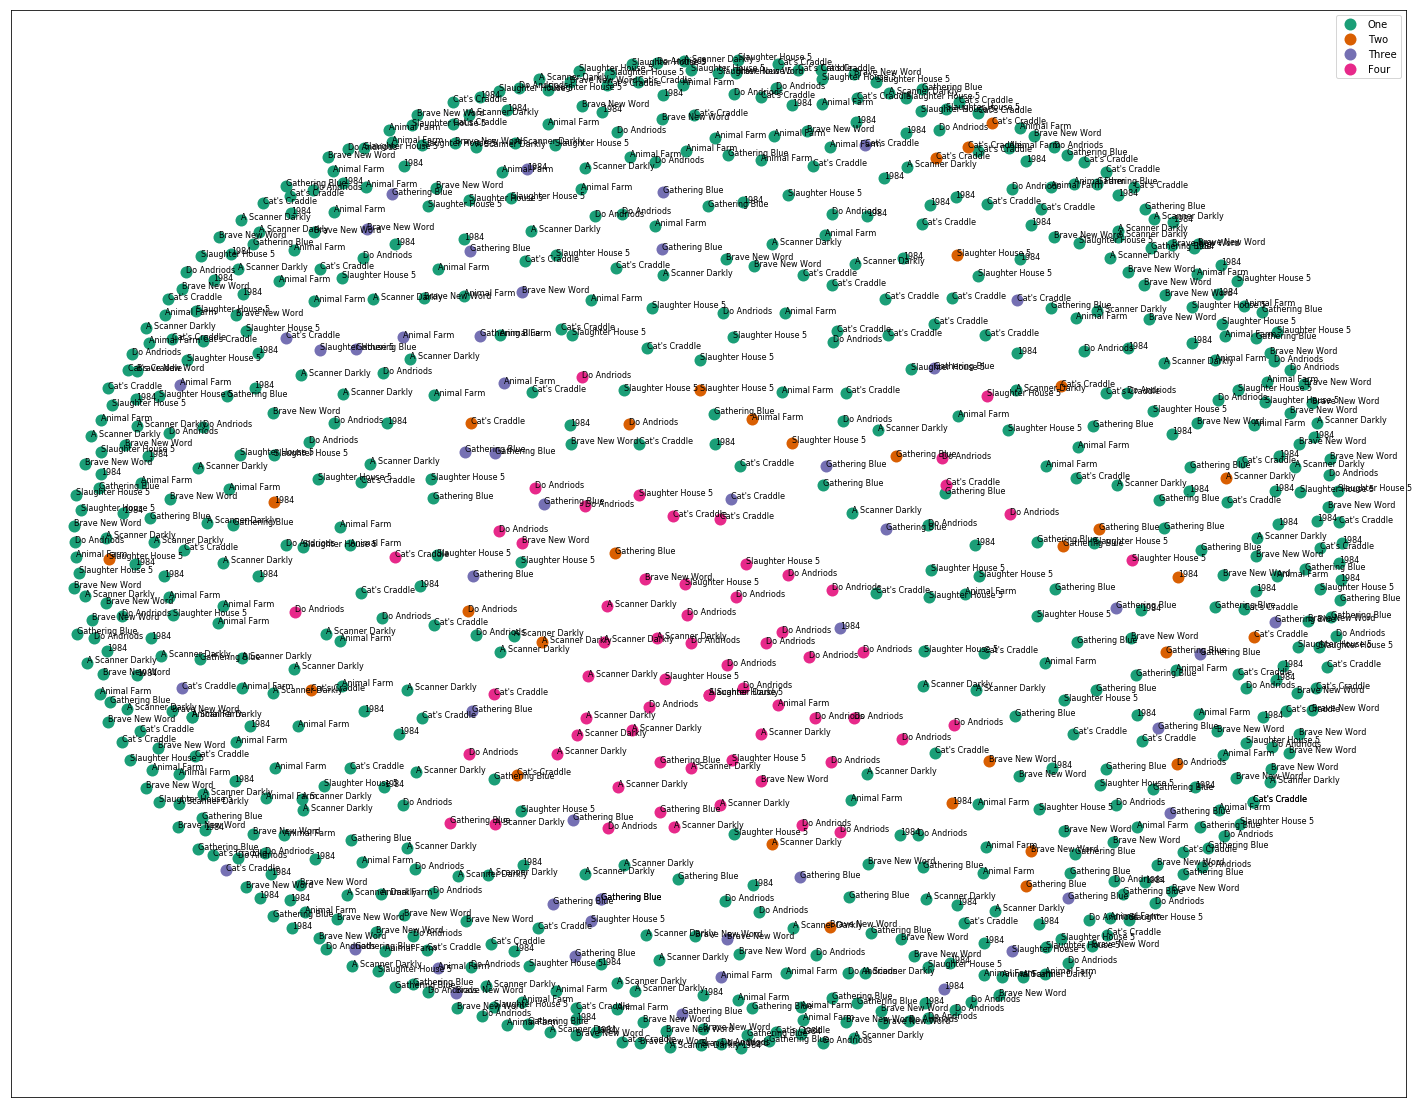

In [67]:
fig, ax = plt.subplots(figsize=(25, 20)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
            label=cluster_names[name], color=cluster_colors[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the label as the film title
for i in range(len(df)):
    ax.text(df.ix[i]['x'], df.ix[i]['y'], df.ix[i]['title'], size=8)  

    
    
plt.show() #show the plot

In [52]:
from __future__ import print_function

print("Top terms per cluster:")
print()
#sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 


Top terms per cluster:

